In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Documents\\AirPassengers.csv")
df

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121
...,...,...
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390


In [3]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df=df.set_index("Month")
df

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121
...,...
15-08-1960,606
15-09-1960,508
15-10-1960,461


# VISUALIZATION

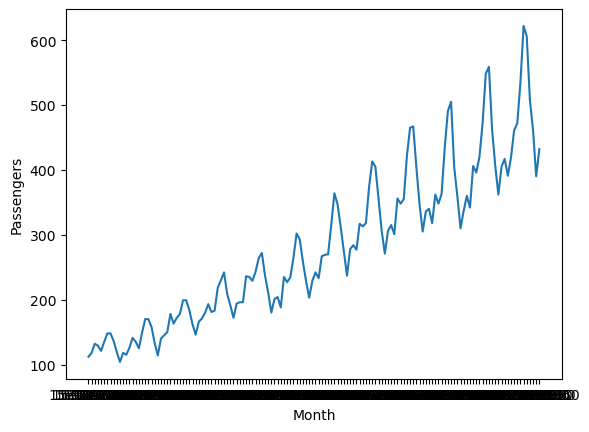

In [6]:
sns.lineplot(x=df.index,y=df["Passengers"])
plt.show()

# STATIONARITY CHECKING

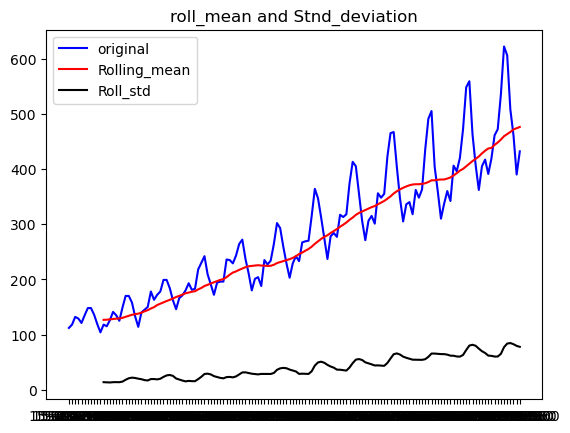

In [7]:
rollmean=df["Passengers"].rolling(window=12).mean()
rollstd=df["Passengers"].rolling(window=12).std()
orig=plt.plot(df["Passengers"],color="blue",label="original")
mean=plt.plot(rollmean,color="red",label="Rolling_mean")
std=plt.plot(rollstd,color="black",label="Roll_std")
plt.title("roll_mean and Stnd_deviation")
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller    ## N0= Data is not stationary,,,,N1=Data is Stationary
adfuller_result=adfuller(df["Passengers"])           
adfuller_result                                          ##p-values is > 0.5 thereforee accept null 

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [9]:
print("P-value:",adfuller_result[1])

P-value: 0.9918802434376409


# MAKING STATIONARY

In [10]:
diff=df["Passengers"]-df["Passengers"].shift(2)
diff.dropna(inplace=True)

In [11]:
adfuller_result=adfuller(diff)

In [12]:
adfuller_result       #### Therefore p< 0.5  accept null hypothesis   ,,,,WHICH MEANS DATA IS STATIONARY

(-2.9616951355554235,
 0.03862975767698849,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414161)

# Now finding(P-PCA) ,(Q-ACF),(D-Shift) values to Build Models

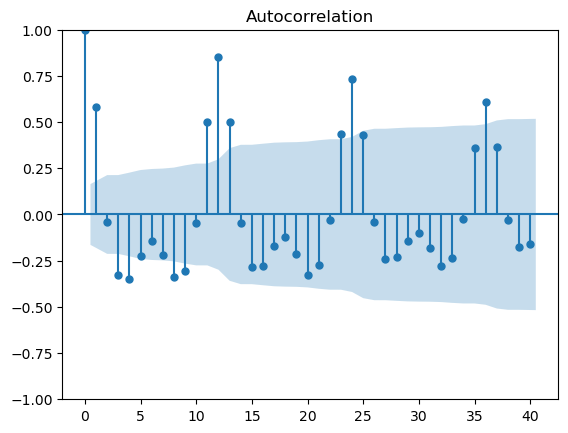

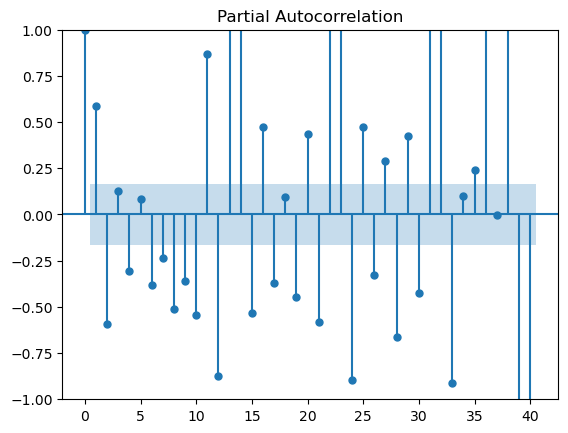

In [13]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig=sm.graphics.tsa.plot_acf(diff,lags=40)
fig=sm.graphics.tsa.plot_pacf(diff,lags=40)

In [14]:
diff.info()

<class 'pandas.core.series.Series'>
Index: 142 entries, 15-03-1949 to 15-12-1960
Series name: Passengers
Non-Null Count  Dtype  
--------------  -----  
142 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [15]:
y_train=diff[:114]
y_test=diff[114:]

In [16]:
y_train.head()

Month
15-03-1949    20.0
15-04-1949    11.0
15-05-1949   -11.0
15-06-1949     6.0
15-07-1949    27.0
Name: Passengers, dtype: float64

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff, order=(1,2,1))
ARIMA = model.fit()

C:\Users\SHAIKH MD KASHIF\anaconda\data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHAIKH MD KASHIF\anaconda\data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHAIKH MD KASHIF\anaconda\data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
y_test.index[1]

'15-10-1958'

In [19]:
y_pred_train=ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])
y_pred_test=ARIMA.predict(start=y_test.index[0],end=y_test.index[-1])

In [20]:
from sklearn.metrics import r2_score
print("Train",r2_score(y_pred_train,y_train))
print("Test",r2_score(y_pred_test,y_test))

Train 0.3402248550423588
Test 0.42396658841401247


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(diff,seasonal_order=(1,2,1,12))
SARIMAX=model.fit()

C:\Users\SHAIKH MD KASHIF\anaconda\data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SHAIKH MD KASHIF\anaconda\data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
y_pred_train=SARIMAX.predict(start=y_train.index[0],end=y_train.index[-1])
y_pred_test=SARIMAX.predict(start=y_test.index[0],end=y_test.index[-1])

In [23]:
from sklearn.metrics import r2_score
print("Train",r2_score(y_pred_train,y_train))
print("Test",r2_score(y_pred_test,y_test))

Train 0.9053209963889327
Test 0.954036114814684


# BEACUSE THERE IS SEASONALITY HENCE SARIMAX IS BETTER